 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_data.dropna(inplace=True)
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_data.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_data.dropna(inplace=True)
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_data = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
#sp500_data.set_index(pd.to_datetime(sp500_data['Date'], infer_datetime_format=True), inplace=True)
#sp500_data.sort_values("Date", ascending=False)
sp500_data.sort_index(ascending=True, inplace=True)
sp500_data.head(5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_data.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_data['Close'] = sp500_data['Close'].str.replace('$', '')
sp500_data['Close'] = sp500_data['Close'].astype('float')
sp500_data.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
#sp500_daily_returns = (sp500_data - sp500_data.shift(-1)) / sp500_data.shift(-1)
sp500_daily_returns = sp500_data.pct_change(1)
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head(5)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close": "S&P 500"
})
sp500_daily_returns.sort_index(ascending=False, inplace=True)
sp500_daily_returns.head(5)

,S&P 500
Date,
2019-04-23,0.008841
2019-04-22,0.001012
2019-04-18,0.001579
2019-04-17,-0.002274
2019-04-16,0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joined_data_cols = pd.concat([whale_data, algo_data, sp500_daily_returns], axis='columns', join='inner')
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

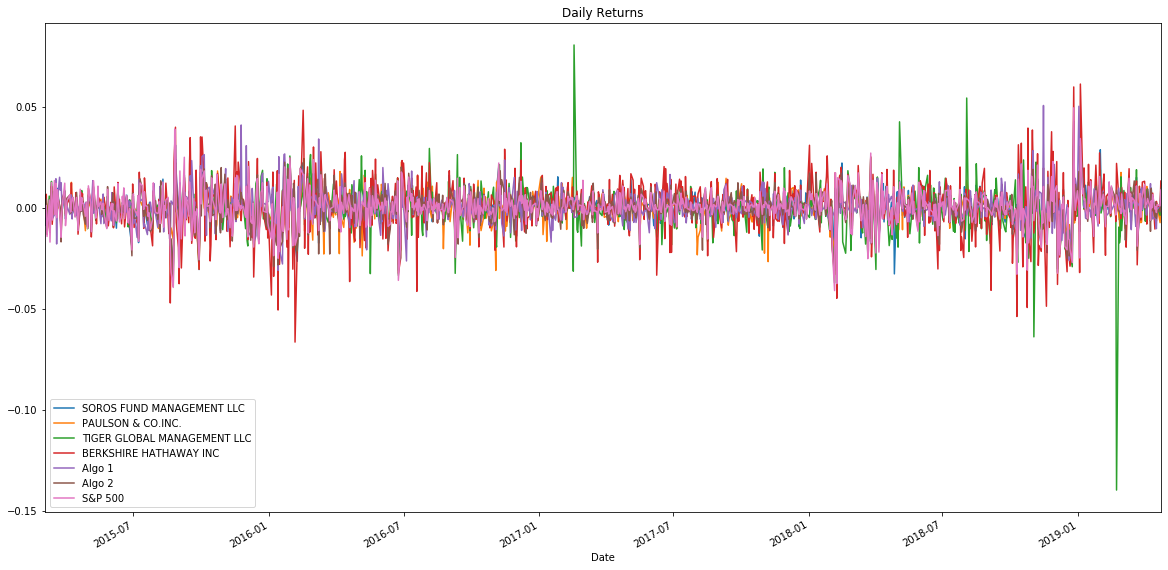

In [15]:
# Plot daily returns
# YOUR CODE HERE
joined_data_cols.plot(title="Daily Returns",figsize=(20,10))

In [16]:
#Calculating Cumulative Returns
cumulative_returns = (1 + joined_data_cols).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


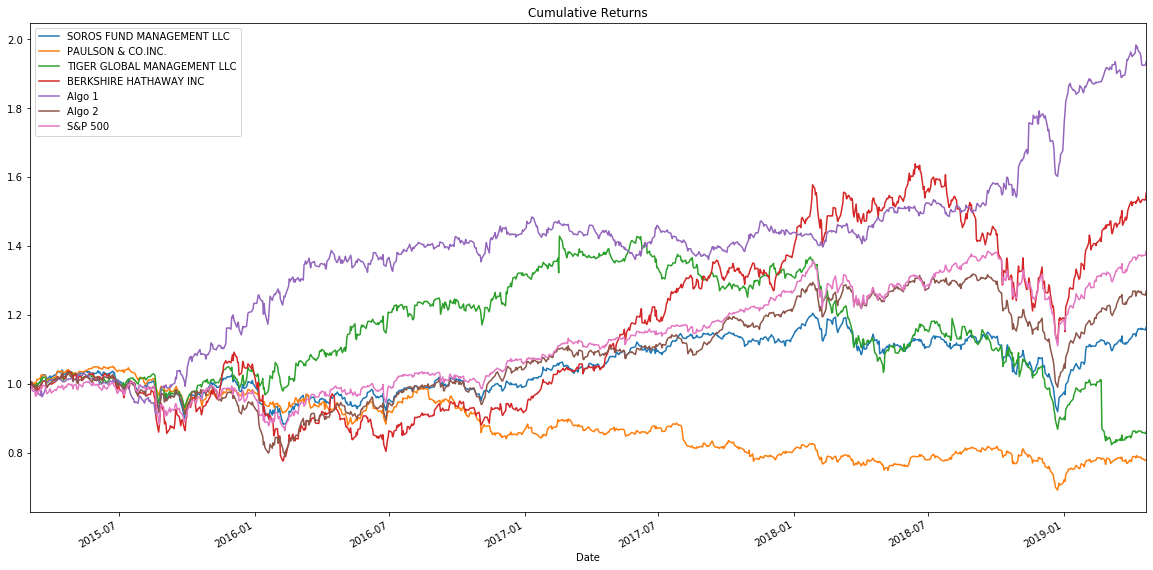

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns.plot(title="Cumulative Returns",figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

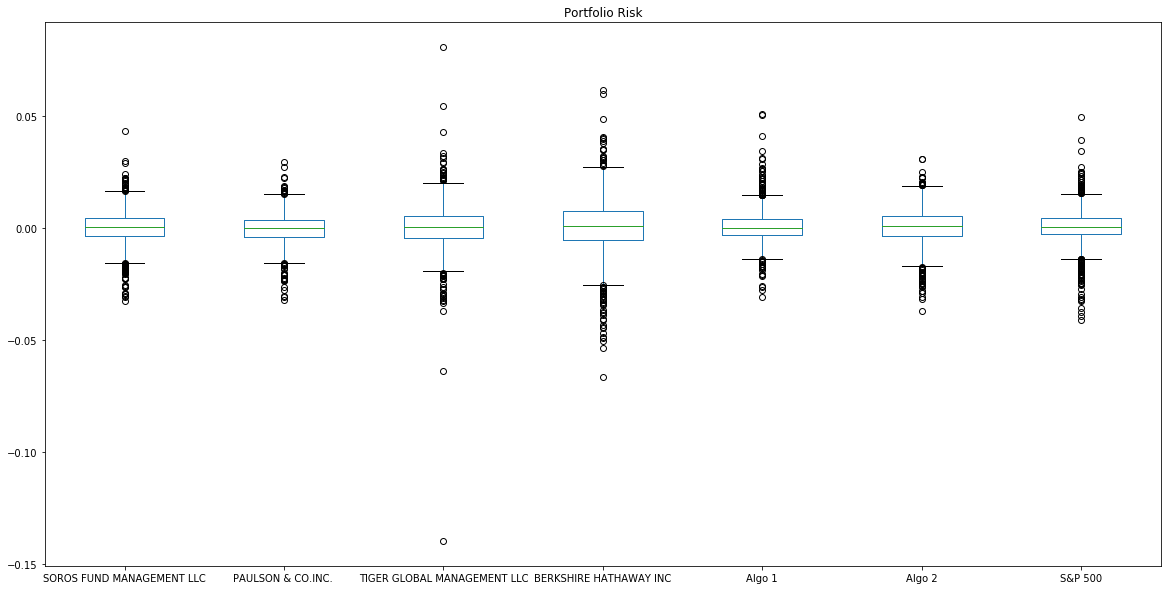

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
joined_data_cols.plot.box(title="Portfolio Risk",figsize=(20,10))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = joined_data_cols.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_df = daily_std > daily_std[6]
riskier_df

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [25]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

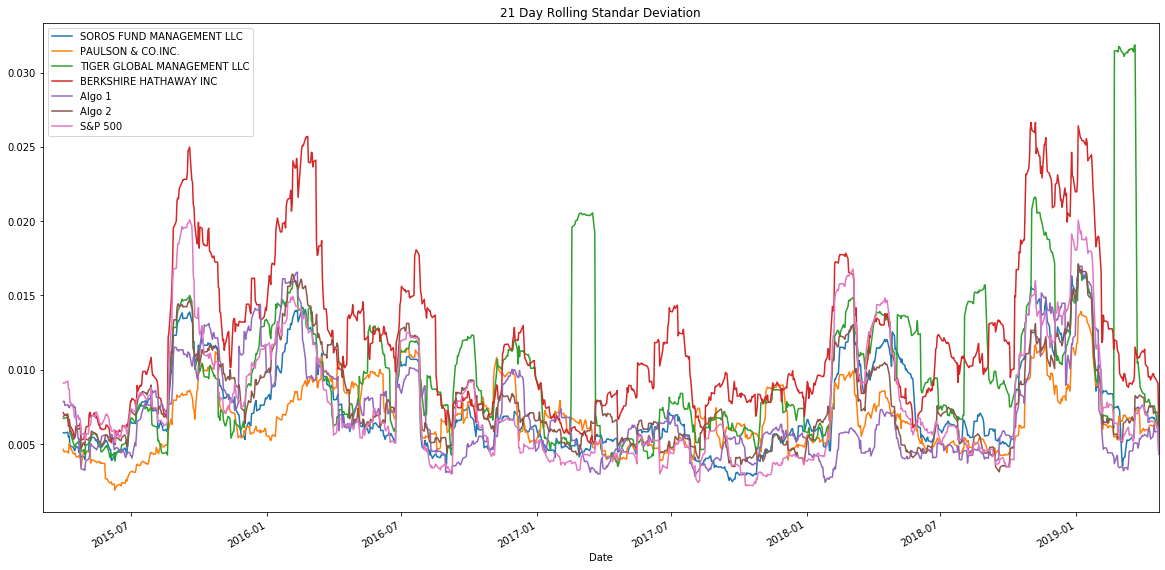

In [32]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
joined_data_cols.rolling(window=21).std().plot(title="21 Day Rolling Standar Deviation",figsize=(20,10))
#sp500_daily_returns.rolling(window=21).std().plot(title="21 Day Rolling Standar Deviation",figsize=(20,10))

In [26]:
# Correlation
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1,0.699823,0.56104,0.754157,0.320901,0.82673,0.000573675
PAULSON & CO.INC.,0.699823,1,0.434308,0.545451,0.268631,0.678085,0.0135489
TIGER GLOBAL MANAGEMENT LLC,0.56104,0.434308,1,0.424125,0.164114,0.50716,-0.00150481
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1,0.291678,0.687756,-0.0138563
Algo 1,0.320901,0.268631,0.164114,0.291678,1,0.287852,-0.0339628
Algo 2,0.82673,0.678085,0.50716,0.687756,0.287852,1,-0.00219195
S&P 500,0.000573675,0.0135489,-0.00150481,-0.0138563,-0.0339628,-0.00219195,1


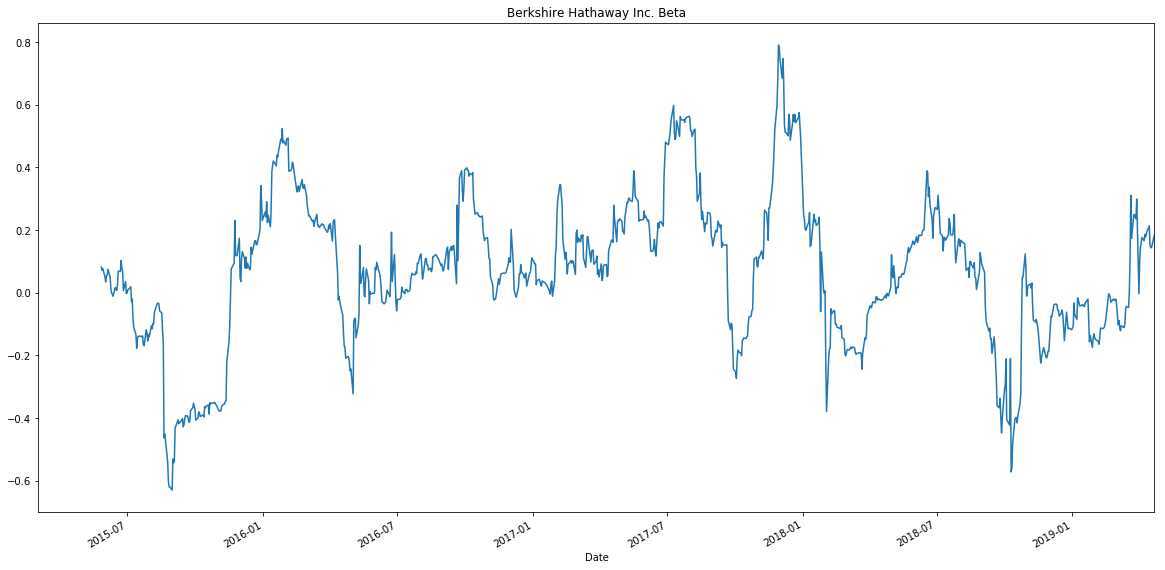

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

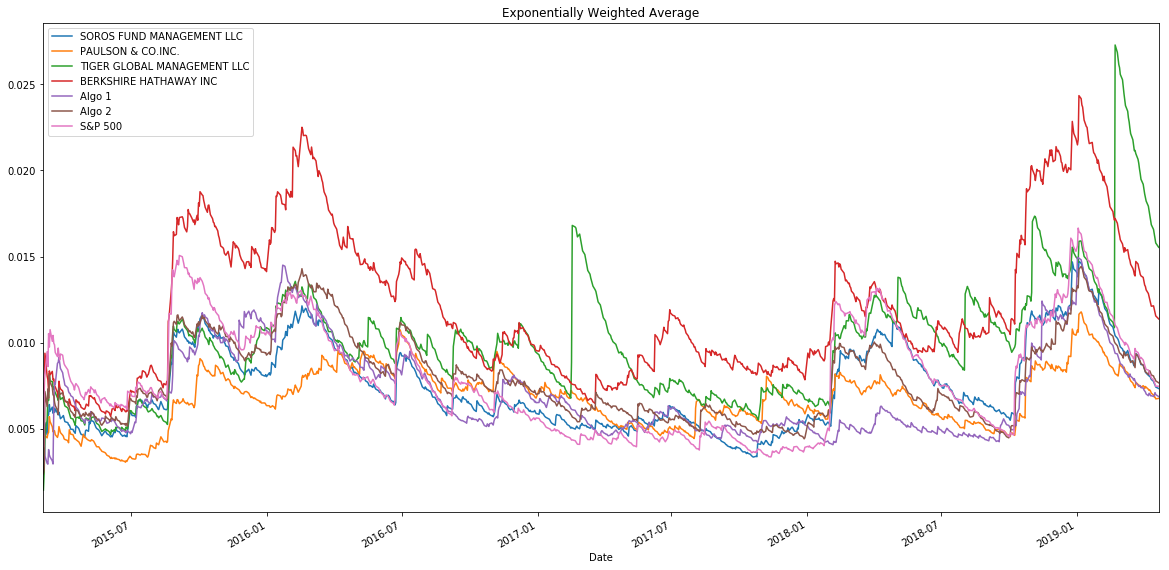

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [29]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

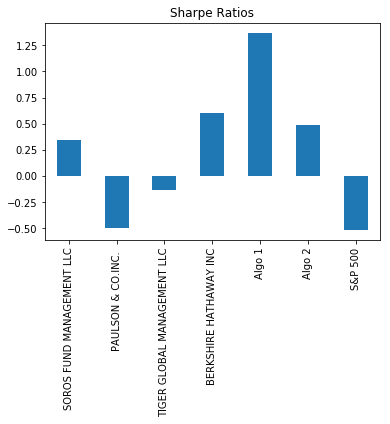

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
# YOUR CODE HERE

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [32]:
# Read the second stock
# YOUR CODE HERE

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [33]:
# Read the third stock
# YOUR CODE HERE

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [34]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [35]:
# Reset the index
# YOUR CODE HERE

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [36]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [37]:
# Drop Nulls
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


In [40]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

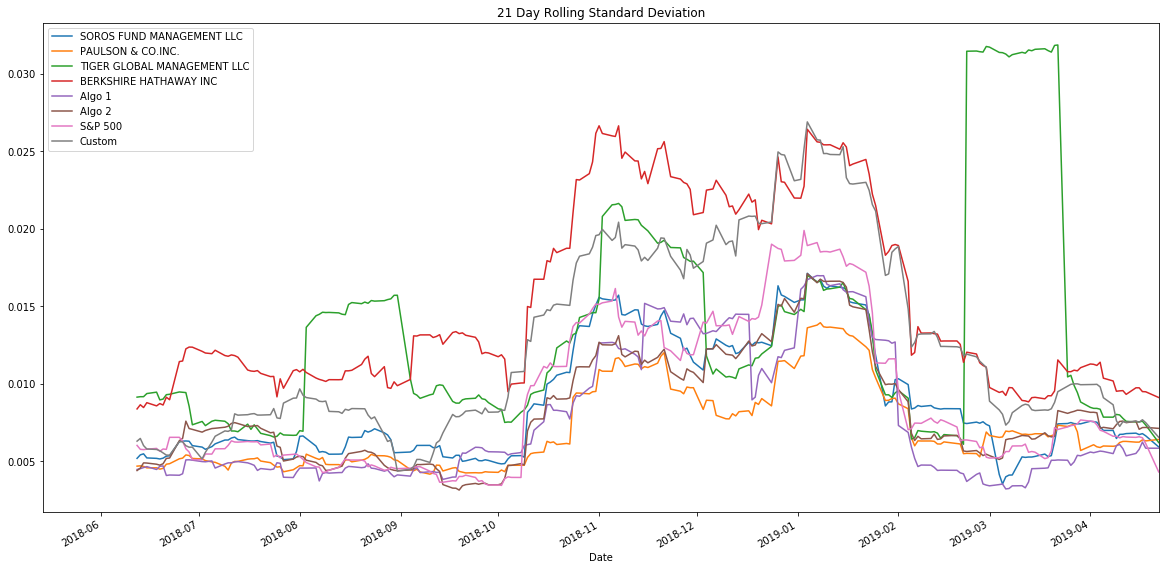

In [42]:
# Rolling
# YOUR CODE HERE

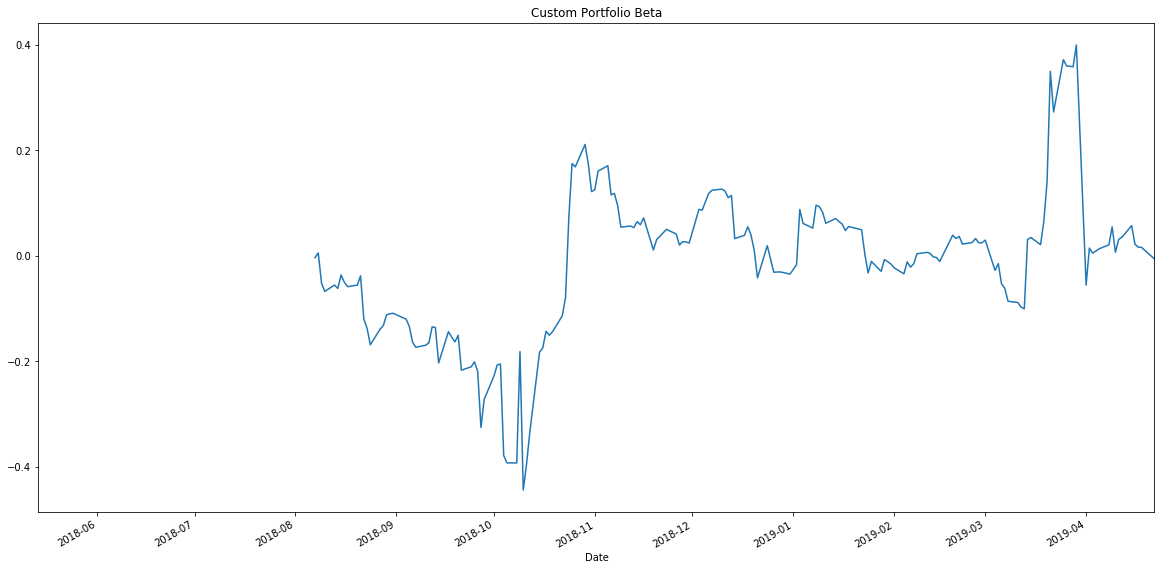

In [43]:
# Beta
# YOUR CODE HERE

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

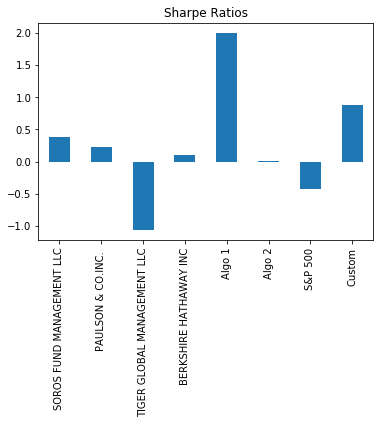

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [46]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791802,0.477844,0.816197,0.336909,0.862583,-0.0282556,0.732548
PAULSON & CO.INC.,0.791802,1,0.484869,0.65039,0.360727,0.783865,-0.0598624,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1,0.324306,0.113671,0.408402,0.00588055,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.65039,0.324306,1,0.325985,0.782054,-0.0388319,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1,-0.0425404,0.73902
S&P 500,-0.0282556,-0.0598624,0.00588055,-0.0388319,-0.054478,-0.0425404,1,0.00560346
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.73902,0.00560346,1
